In [1]:
import cv2 as cv
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

 # detect eyes for face detection , if two eyes are detected then only we keep that image otherwise discard it.

In [2]:
img = cv.imread('./virat_kohli/2-.jpg')
img.shape

(800, 1200, 3)

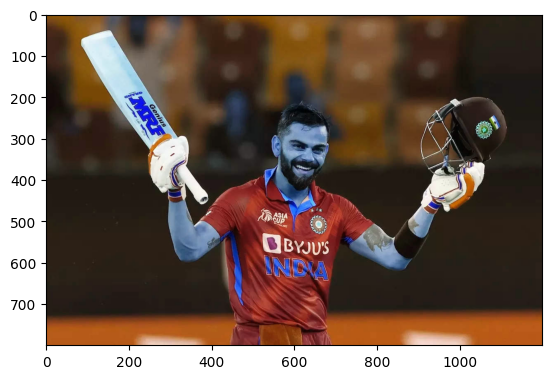

In [3]:
plt.imshow(img)

In [4]:
# convert it to gray scale img
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_img.shape

(800, 1200)

In [5]:
img[0][0] , gray_img[0][0]

(array([138,  83,  14], dtype=uint8), 69)

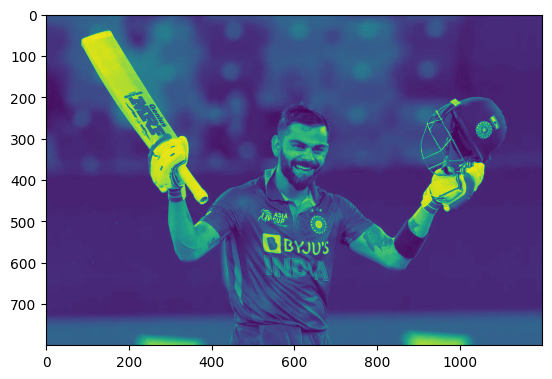

In [6]:
plt.imshow(gray_img )

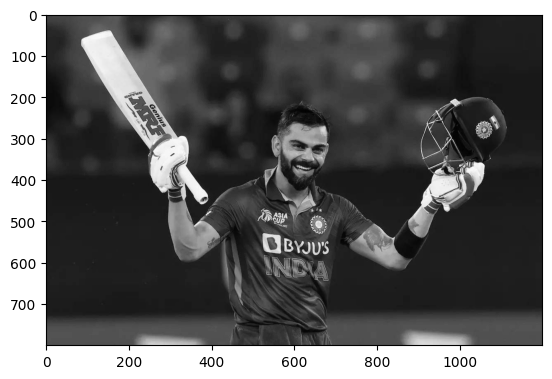

In [7]:
plt.imshow(gray_img , cmap='gray')
plt.show()

In [1]:
face_cascade = cv.CascadeClassifier('./opencv-haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('./opencv-haarcascade/haarcascade_eye.xml')



NameError: name 'cv' is not defined

[[563 272 135 135]]


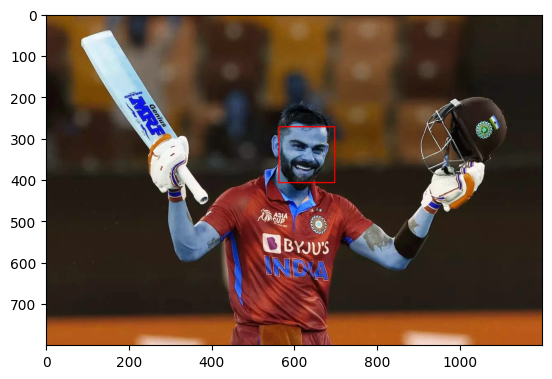

In [9]:
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)

print(faces)
for (x,y,w,h) in faces:
    face_box = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    plt.imshow(face_box)
    
# else:
#     print('not found any face on image')

In [10]:
eyes = eye_cascade.detectMultiScale(gray_img, 1.3, 5)

print(eyes)
for (x,y,w,h) in eyes:
    eye_box = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    plt.imshow(eye_box)
    


()


[[ 86 178 362 362]]


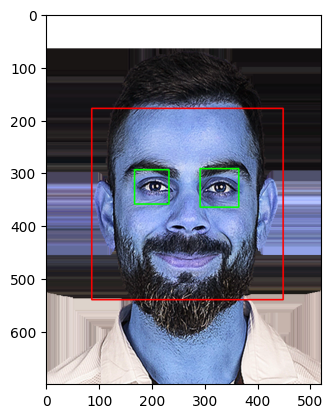

In [25]:
def detectFaceAndEyes(img ):
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    print(faces)
    
    for (fx,fy,fw,fh) in faces:
        face_box = cv.rectangle(img,(fx,fy),(fx+fw,fy+fh),(255,0,0),2)
        
        crop_gray_face = gray_img[fy:fy+fh, fx:fx+fw]
        eyes = eye_cascade.detectMultiScale(crop_gray_face)
        
          
        crop_color_face = face_box[fy:fy+fh, fx:fx+fw]
        
        
        for (ex,ey,ew,eh) in eyes:
            cv.rectangle(crop_color_face,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
        
    plt.imshow(img)
    plt.show()
    

img = cv.imread('./virat_kohli/164.png')
detectFaceAndEyes(img )    


#  get cropped face from img if two eyes are present

In [36]:
def get_cropped_img(img ):
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    # print(faces)
    
    for (fx,fy,fw,fh) in faces:
        
        crop_gray_face = gray_img[fy:fy+fh, fx:fx+fw]
        crop_color_face = img[fy:fy+fh, fx:fx+fw]
        
        eyes = eye_cascade.detectMultiScale(crop_gray_face)
        
        if(len(eyes) >= 2):
            return crop_color_face 
    return []


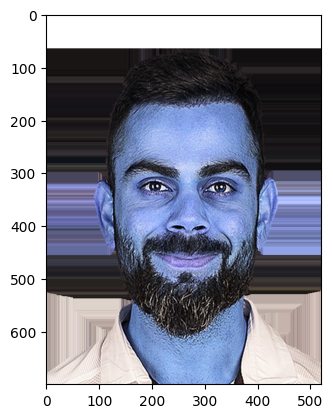

In [27]:
original_img = cv.imread('./virat_kohli/164.png')
plt.imshow(original_img)
plt.show()

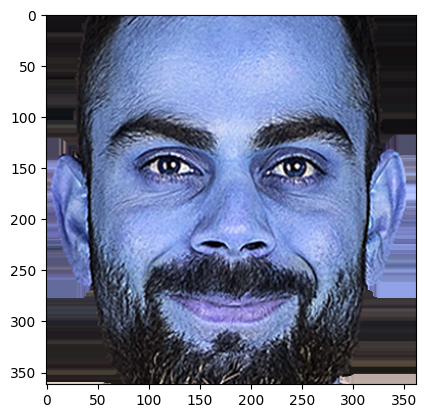

In [33]:
cropped_img = get_cropped_img(original_img ) 
if( len(cropped_img) !=  0):
    plt.imshow(cropped_img)
    plt.show()
    plt.imsave('cropped_kohli.png' , cropped_img)
else:
    print('not a clear img with two eyes visible')

not a clear img with two eyes visible


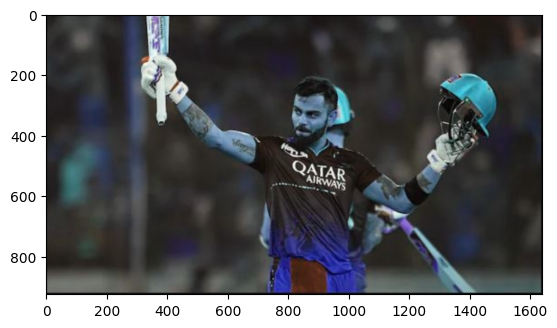

In [38]:
original_img = cv.imread('./virat_kohli/virat-kohli.png')
plt.imshow(original_img)
cropped_img = get_cropped_img(original_img ) 
if( len(cropped_img) !=  0):
    plt.imshow(cropped_img)
    plt.imsave('cropped_kohli.png' , cropped_img)
    plt.show()
else:
    print('not a clear img with two eyes visible')

# save the cropped image in a cropped folder

In [74]:
import os 
img_dirs = []
for entry in os.scandir('./datasets/'):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
print(img_dirs)

['./datasets/Cristiano_Ronaldo', './datasets/ms_dhoni', './datasets/virat_kohli']


In [52]:
targets = list(map(lambda x : x.split('/')[2]  , img_dirs))
targets

['khali', 'ms_dhoni', 'virat_kohli']

In [71]:
def create_path_if_not_exists(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [77]:

for celeb_folder_dir in img_dirs :
    celeb_name =  celeb_folder_dir.split('/')[-1]
    
    count = 1
    folder_path = f'./cropped_dataset/{celeb_name}'
    create_path_if_not_exists(folder_path)
    print('cropping ' , celeb_name , ' images')
    
    for img_dir in os.scandir(celeb_folder_dir):
            img = cv.imread(img_dir.path)
            if img is not None:
                cropped_img = get_cropped_img(img ) 
                if( len(cropped_img) !=  0):                    
                    path_to_save = f'{folder_path}/{celeb_name}-{count}.png'
                    cv.imwrite(path_to_save , cropped_img)
                    count+=1
            else:
                os.remove(img_dir.path)


cropping  Cristiano_Ronaldo  images
cropping  ms_dhoni  images
cropping  virat_kohli  images


In [13]:
def detectAndDisplay(frame):
 frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 frame_gray = cv.equalizeHist(frame_gray)
 
 face_cascade = cv.CascadeClassifier('./haarcascade_frontalface_default.xml')
#  eye_cascade = cv.CascadeClassifier('./haarcascade_eye.xml')

 faces = face_cascade.detectMultiScale(frame_gray, 1.3, 5)
 
 print(faces)
#  (x,y,w,h) = faces[0]
 
#  print(x,y,w,h)
 
 
 face_img = cv.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
 cv.imshow('Capture - Face detection', frame)

In [14]:
cap = cv.VideoCapture(0)
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
 
    # Display the resulting frame
    
    try:
      detectAndDisplay(frame)
    # Press Q on keyboard to  exit    
      
      if cv.waitKey(25) & 0xFF == ord('q'):
         break
    except Exception as e:
      print(e)
      cap.release() 
      cv.destroyAllWindows()
   
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv.destroyAllWindows()